In [1]:
#  Iris Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df=pd.read_csv("iris_csv.csv")

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Some basic statistical analysis about the data
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#basic info of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#sample of each class
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [7]:
#check for null value
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

# outlier detection 

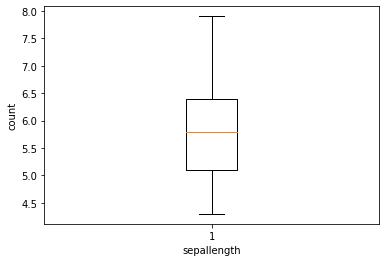

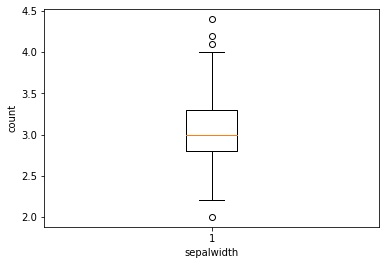

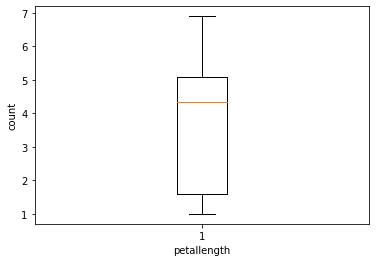

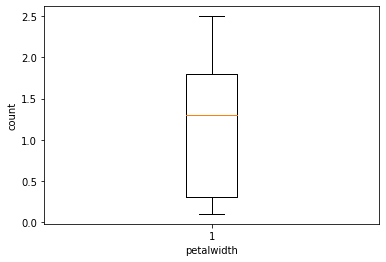

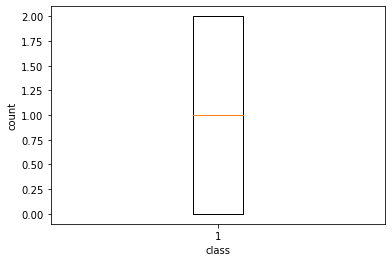

In [81]:
col_name=df.columns
for col_name in df.columns:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()


As we see there is an outliers in sepal width columns

In [9]:
df.shape 

(150, 5)

# Outlier Handling

In [82]:
def remove_outliers(df,columnName):     #function to delete outliers
  q1=np.percentile(df[columnName],0.25)
  q3=np.percentile(df[columnName],0.75)
  IQR=q3-q1 # inter quartile range 
  UL = q3+1.5* q3  #upper limit
  LL=q1-1.5*q1 # lower limit 
  df =df[(df[columnName] > LL) & (df[columnName] < UL)]
  return df


In [83]:
remove_outliers(df,['sepalwidth'])

,sepallength,sepalwidth,petallength,petalwidth,class
0,NaN,3.5,NaN,NaN,NaN
1,NaN,3.0,NaN,NaN,NaN
2,NaN,3.2,NaN,NaN,NaN
3,NaN,3.1,NaN,NaN,NaN
4,NaN,3.6,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,3.0,NaN,NaN,NaN
146,NaN,2.5,NaN,NaN,NaN
147,NaN,3.0,NaN,NaN,NaN
148,NaN,3.4,NaN,NaN,NaN


# Null value check

In [12]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

<AxesSubplot:>

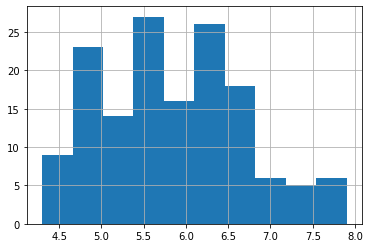

In [13]:
df['sepallength'].hist()

<AxesSubplot:>

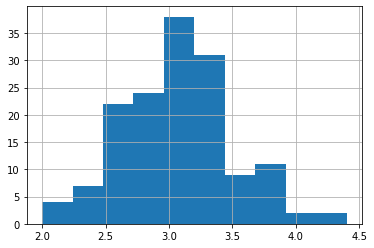

In [14]:
df['sepalwidth'].hist()

<AxesSubplot:>

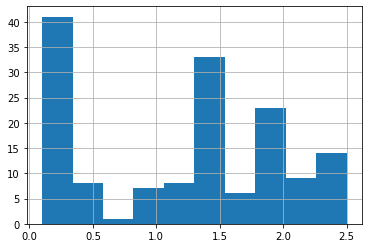

In [15]:
df['petalwidth'].hist()

<AxesSubplot:>

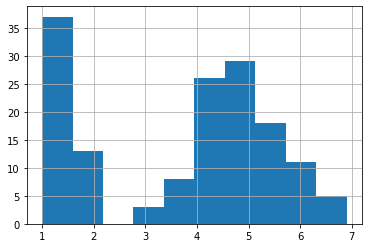

In [16]:
df['petallength'].hist()

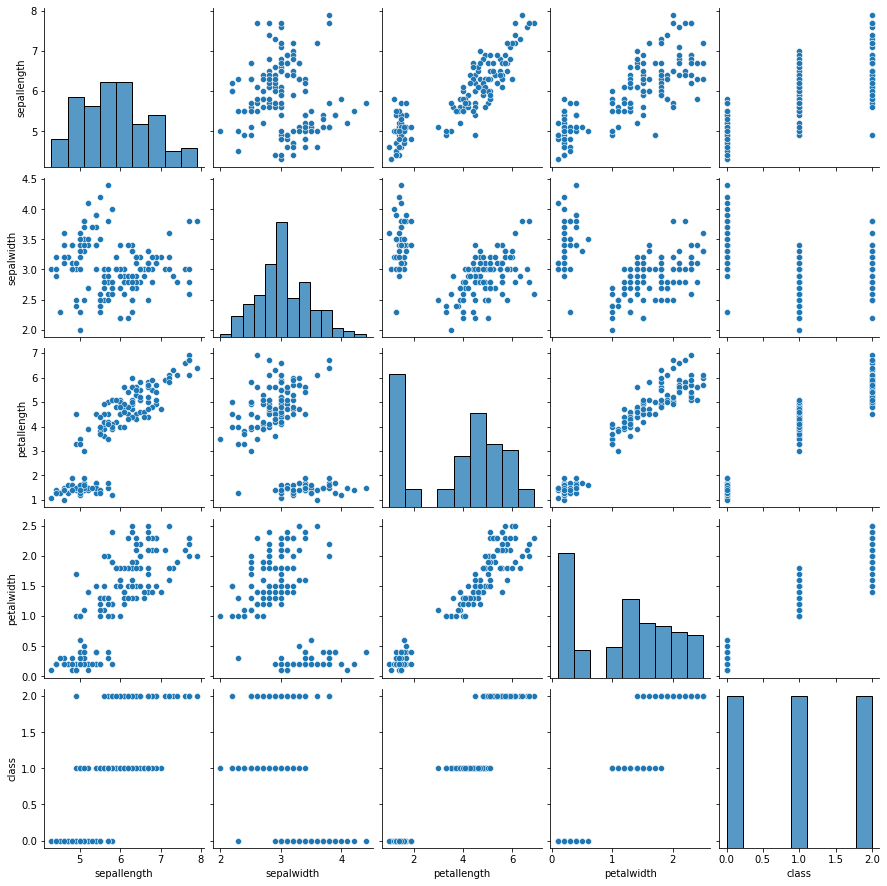

In [84]:
# Visualize the whole dataset
sns.pairplot(df )

In [18]:
df.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

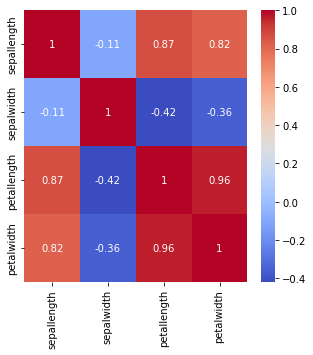

In [19]:
cor=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cor,annot= True, ax=ax, cmap='coolwarm')

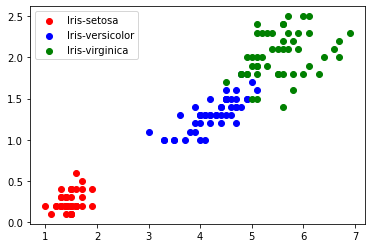

In [20]:
df1 = df[df['class']=='Iris-setosa']
df2 = df[df['class']=='Iris-versicolor']
df3 = df[df['class']=='Iris-virginica']

plt.scatter(df1['petallength'],df1['petalwidth'], color='r' , label='Iris-setosa')
plt.scatter(df2['petallength'],df2['petalwidth'], color='b', label='Iris-versicolor')
plt.scatter(df3['petallength'],df3['petalwidth'], color='g' , label='Iris-virginica ')

plt.legend()
plt.show()

# Segregate & Zipping Dataset

In [49]:
x= df.iloc[:,0:4]
y=df.iloc[:,4]
X=np.array(list(zip(x,y)))

# Finding the Optimized K Value

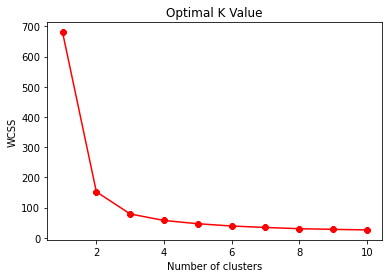

In [51]:
from sklearn.cluster import KMeans
 
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the elbow method to estimate the value k

as elbow is bend in 3 place so we choose cluster size as 3

# Fitting the k-means to the dataset with k=3

In [78]:
model=KMeans(n_clusters=3,init='k-means++', max_iter =100,random_state=0) #k-means++', 'random', an array-like or a callable
y_means = model.fit_predict(X)
   

# Visualizing the clusters for k=3

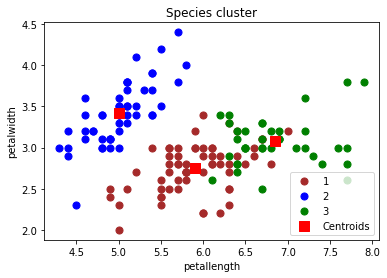

In [79]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title('Species cluster')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()
plt.show()

# Accuracy check

In [80]:
from sklearn.metrics import silhouette_score


from sklearn.metrics import silhouette_score

# Calculate the Silhouette score
score = silhouette_score(X, y_means)

print("Silhouette score:", score)  

Silhouette score: 0.5525919445499757


The Silhouette score is a value between -1 and 1, where a score closer to 1 indicates better cluster separation.